In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from utils import loadImages, computeHOG, evaluationMetrics
%matplotlib inline

# Dataset

In [2]:
positive_samples = np.array(loadImages('outputs/images/buildings.npy'))
negative_samples = np.array(loadImages('outputs/images/non-buildings.npy')[:1700])

In [3]:
positive_hog = computeHOG(positive_samples)
negative_hog = computeHOG(negative_samples)
dataset = np.concatenate((positive_hog, negative_hog), axis=0)

/Users/andersbarfod/.virtualenvs/itu-iaml-env/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [4]:
# Create the class labels, i.e. (+1) positive and (-1) negative.
labels = []
[labels.append(+1) for _ in range(len(positive_hog))]
[labels.append(-1) for _ in range(len(negative_hog))]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# Machine Learning

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3, random_state=42)

In [6]:
clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [7]:
clf.score(X_test, y_test)

0.884272997032641

In [8]:
y_pred = clf.predict(X_test)

In [9]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [10]:
precision, recall, accuracy = evaluationMetrics(tp, fp, tn, fn)

In [11]:
print(precision, recall, accuracy)

0.9344608879492601 0.8371212121212122 0.884272997032641


In [97]:
image = positive_samples[200]
greyscale = rgb2gray(image)

# PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset)

In [18]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [22]:
# rename labels
Y = pd.Series(labels, name="Label")
di = {1: "House", -1: "Non-house"}
Y.replace(di, inplace=True)

In [23]:
finalDf = pd.concat([principalDf, Y], axis = 1)

In [25]:
finalDf.head()

,principal component 1,principal component 2,Label
0,0.032453,-0.041436,House
1,-0.230443,-0.052379,House
2,-0.086980,-0.144479,House
3,-0.217083,0.029203,House
4,-0.055102,-0.070942,House


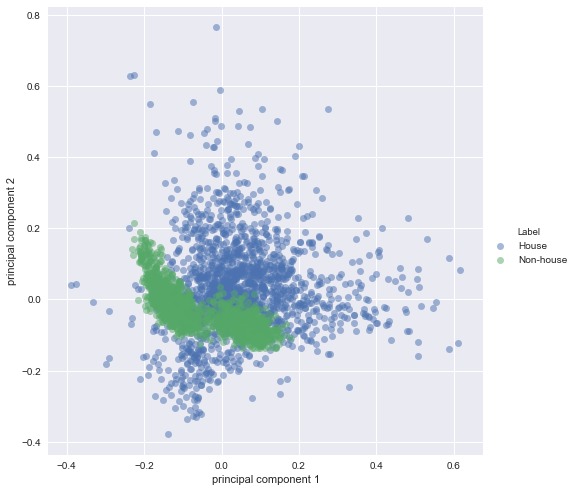

In [28]:
# Create scatterplot of dataframe
sns.set()

g = sns.lmplot('principal component 1', # Horizontal axis
           'principal component 2', # Vertical axis
           data=finalDf, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Label", # Set color
           scatter_kws=dict(alpha=0.5),
           size=7,
           legend=True
          )

In [ ]:
sns.pairplot(finalDf, 
             vars=['HOG mean', 'HOG median', 'Y'], 
             hue="Label",
             hue_order=['Non-house', 'House'],
             plot_kws=dict(alpha=0.3),
             diag_kind='kde'
            )

# Sandkasse

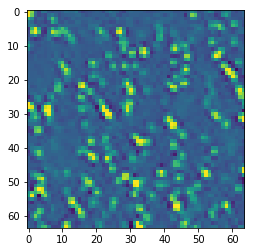

In [95]:
imgplot = plt.imshow(greyscale)

In [98]:
image.shape

(60, 60, 3)